In [29]:
# brute-force algorithm for the maximum sublist product problem
#
# it goes through all the sublists of x, evaluates the product over the sublist elements for each,
# and then returns the sublist corresponding to the maximal value of that product
#
# easy to write, easy to prove correct, but inefficient
#
def brute_force_sublist_product_debug(x, debug_flag):
    # left and right limit indices of the best sublist, left_idx included, right_idx excluded
    left_idx, right_idx = 0, 0
    max_sublist_product = 1
    if debug_flag:
        print("Initializing sublist indices as", left_idx, ":", right_idx)
        print("x[", left_idx, ":", right_idx, "] = ", x[left_idx: right_idx], sep='')
        print("Product over sublist elements:", round(max_sublist_product, 5), end='')
        input()
    for i in range(len(x)):
        for j in range(i+1, len(x)+1):
            sublist_product = 1
            for k in range(i, j):
                sublist_product *= x[k]
            if sublist_product > max_sublist_product:
                left_idx = i
                right_idx = j
                max_sublist_product = sublist_product
                if debug_flag:
                    print("\nImproved intermediate result for indices", left_idx, ":", right_idx)
                    print("x[", left_idx, ":", right_idx, "] = ", x[left_idx: right_idx], sep='')
                    print("Product over sublist elements:", round(max_sublist_product, 5), end='')
                    input()
        if debug_flag:
            print("This is the best so far, considering all i up to ", i, \
                  ";\tmax. sublist product: ", round(max_sublist_product, 5), sep='')
    if debug_flag:
        print("\nThis is the best overall\nReturning x[", left_idx, ":", right_idx, "] = ", \
              x[left_idx: right_idx], sep='')
        print("Product over sublist elements:", round(max_sublist_product, 5))
    return x[left_idx: right_idx]

def brute_force_sublist_product(x):
    return brute_force_sublist_product_debug(x, False)

In [24]:
import random

n = 7
test_list_n = [round(random.uniform(-2.75, 1.75), 2) for j in range(n)]
print("Test list:", test_list_n, end="\n\n")
max_sublist_n = brute_force_sublist_product_debug(test_list_n, True)
print("\nReturned sublist:", max_sublist_n)

Test list: [0.76, -1.55, -2.07, 1.57, -0.52, -2.6, 0.75]

Initializing sublist indices as 0 : 0
x[0:0] = []
Product over sublist elements: 1

Improved intermediate result for indices 0 : 3
x[0:3] = [0.76, -1.55, -2.07]
Product over sublist elements: 2.43846

Improved intermediate result for indices 0 : 4
x[0:4] = [0.76, -1.55, -2.07, 1.57]
Product over sublist elements: 3.82838

Improved intermediate result for indices 0 : 6
x[0:6] = [0.76, -1.55, -2.07, 1.57, -0.52, -2.6]
Product over sublist elements: 5.17597
This is the best so far, considering all i up to 0;	max. sublist product: 5.17597

Improved intermediate result for indices 1 : 6
x[1:6] = [-1.55, -2.07, 1.57, -0.52, -2.6]
Product over sublist elements: 6.81049
This is the best so far, considering all i up to 1;	max. sublist product: 6.81049
This is the best so far, considering all i up to 2;	max. sublist product: 6.81049
This is the best so far, considering all i up to 3;	max. sublist product: 6.81049
This is the best so far, 

In [ ]:
# *** RETAINED HERE FOR REFERENCE PURPOSES; SEE BELOW FOR THE ADJUSTED VERSION ***
#
# Kadane's algorithm for the maximum sublist sum problem
#
# The algorithm keeps track of the solution for the subproblem
# defined for x[0:j] while incrementing j until it reaches len(x)
#
# Since the partial solution is remembered and recalled if
# necessary, this is usually classified as an application of the
# decomposition technique known as dynamic programming
#
def kadane_sublist_sum_debug(x, debug_flag):
    left_idx, right_idx = 0, 0  # left and right limit indices of the best sublist within x[0:j]
    max_sublist_sum = 0  # maximum sublist sum obtained from within x[0:j]
    i = 0  # left boundary for the presently considered sublist, ending at index j
    sublist_sum = 0  # maximum sum for a sublist that ends exactly at index j
    if debug_flag:
        print("Initializing sublist indices as", left_idx, ":", right_idx)
        print("x[", left_idx, ":", right_idx, "] = ", x[left_idx: right_idx], sep='')
        print("Sum over sublist elements:", max_sublist_sum, end='')
        input()
    for j in range(len(x)):
        if debug_flag:
            print("This is the best so far, considering the range x[0:", j, "];\tmax. sublist sum: ", \
                  max_sublist_sum, ";\ti,j = ", i, ",", j, sep='')
        sublist_sum += x[j]  # sum over x[i: j+1]
        if sublist_sum < 0:
            i = j+1
            sublist_sum = 0  # sum over the empty list x[j+1: j+1]
        elif sublist_sum > max_sublist_sum:
            left_idx, right_idx = i, j+1
            max_sublist_sum = sublist_sum
            if debug_flag:
                print("\nImproved intermediate result for indices", left_idx, ":", right_idx)
                print("x[", left_idx, ":", right_idx, "] = ", x[left_idx: right_idx], sep='')
                print("Sum over sublist elements:", max_sublist_sum, end='')
                input()
    if debug_flag:
        print("\nThis is the best overall\nReturning x[", left_idx, ":", right_idx, "] = ", \
              x[left_idx: right_idx], sep='')
        print("Sum over sublist elements:", max_sublist_sum)
    return x[left_idx: right_idx]
    
def kadane_sublist_sum(x):
    return kadane_sublist_sum_debug(x, False)

In [25]:
def kadane_sublist_product_debug(x, debug_flag):
    left_idx_max, right_idx_max = 0, 0  # left and right limit indices of the max sublist within x[0:j]
    left_idx_min, right_idx_min = 0, 0  # left and right limit indices of the min sublist within x[0:j]
    max_sublist_product_so_far = 1  # maximum sublist product obtained from within x[0:j]
    i_max_here = 0  # left boundary for the presently considered max. sublist, ending at index j
    i_min_here = 0  # left boundary for the presently considered max. sublist, ending at index j
    max_sublist_product_here = 1  # maximum product for a sublist that ends exactly at index j
    min_sublist_product_here = 1  # minimum product for a sublist that ends exactly at index j
    if debug_flag:
        print("Initializing sublist indices as", left_idx_max, ":", right_idx_max)
        print("x[", left_idx_max, ":", right_idx_max, "] = ", x[left_idx_max: right_idx_max], sep='')
        print("Product over sublist elements:", 1, end='')
        input()
    for j in range(len(x)):
        if debug_flag:
            print("This is the best so far, considering the range x[0:", j, \
                  "];\tmax. sublist product: ", round(max_sublist_product_so_far, 5), \
                  " (from x[", left_idx_max, ":", right_idx_max, "])", sep='')
        if x[j] > 0:
            max_sublist_product_here *= x[j]  # product over x[i_max_here: j+1]
            min_sublist_product_here *= x[j]  # product over x[i_min_here: j+1]
        else:
            max_sublist_product_here, min_sublist_product_here \
                = min_sublist_product_here * x[j], max_sublist_product_here * x[j]  # swap max, min
            i_max_here, i_min_here = i_min_here, i_max_here  # swap max, min
        if max_sublist_product_here < 1:
            i_max_here = j+1
            max_sublist_product_here = 1  # product over the empty list x[j+1: j+1]
        if min_sublist_product_here > 1:
            i_min_here = j+1
            min_sublist_product_here = 1  # product over the empty list x[j+1: j+1]
        if debug_flag:
            print("\t\tmax. ending at index ", j+1, ": ", x[i_max_here: j+1], \
                  " => ", round(max_sublist_product_here, 5), sep="")
            print("\t\tmin. ending at index ", j+1, ": ", x[i_min_here: j+1], \
                  " => ", round(min_sublist_product_here, 5), sep="")
        if max_sublist_product_here > max_sublist_product_so_far:
            left_idx_max, right_idx_max = i_max_here, j+1
            max_sublist_product_so_far = max_sublist_product_here
            if debug_flag:
                print("Improved intermediate result for indices", left_idx_max, ":", right_idx_max)
                print("x[", left_idx_max, ":", right_idx_max, "] = ", x[left_idx_max: right_idx_max], sep='')
                print("Product over sublist elements:", round(max_sublist_product_so_far, 5))
                input()
    if debug_flag:
        print("\nThis is the best overall\nReturning x[", left_idx_max, ":", right_idx_max, "] = ", \
              x[left_idx_max: right_idx_max], sep='')
        print("Sum over sublist elements:", round(max_sublist_product_so_far, 5))
    return x[left_idx_max: right_idx_max]
    
def kadane_sublist_product(x):
    return kadane_sublist_product_debug(x, False)

In [26]:
print("Test list:", test_list_n, end="\n\n")
max_sublist_n = kadane_sublist_product_debug(test_list_n, True)
print("\nReturned sublist:", max_sublist_n)

Test list: [0.76, -1.55, -2.07, 1.57, -0.52, -2.6, 0.75]

Initializing sublist indices as 0 : 0
x[0:0] = []
Product over sublist elements: 1
This is the best so far, considering the range x[0:0];	max. sublist product: 1 (from x[0:0])
		max. ending at index 1: [] => 1
		min. ending at index 1: [0.76] => 0.76
This is the best so far, considering the range x[0:1];	max. sublist product: 1 (from x[0:0])
		max. ending at index 2: [] => 1
		min. ending at index 2: [-1.55] => -1.55
This is the best so far, considering the range x[0:2];	max. sublist product: 1 (from x[0:0])
		max. ending at index 3: [-1.55, -2.07] => 3.2085
		min. ending at index 3: [-2.07] => -2.07
Improved intermediate result for indices 1 : 3
x[1:3] = [-1.55, -2.07]
Product over sublist elements: 3.2085

This is the best so far, considering the range x[0:3];	max. sublist product: 3.2085 (from x[1:3])
		max. ending at index 4: [-1.55, -2.07, 1.57] => 5.03735
		min. ending at index 4: [-2.07, 1.57] => -3.2499
Improved intermed

In [30]:
import time
import random

step = 10
nmax = 500
repetitions = 50

perf_brute, perf_kadane = {}, {}
avg_sublist_length = {}
random.seed()

for n in range(0, nmax+1, step):
    runtime_brute, runtime_kadane = 0.0, 0.0
    sublist_lengths_brute, sublist_lengths_kadane = 0, 0
    for i in range(repetitions):
        test_list = [round(random.uniform(-2.75, 1.75), 2) for j in range(n)]
        
        start = time.time()
        sublist_lengths_brute += len(brute_force_sublist_product(test_list))
        runtime_brute += time.time() - start
        
        start = time.time()
        sublist_lengths_kadane += len(kadane_sublist_product(test_list))
        runtime_kadane += time.time() - start
        
    perf_brute[n] = runtime_brute / repetitions
    perf_kadane[n] = runtime_kadane / repetitions
    
    print(n, perf_brute[n], perf_kadane[n], \
          sublist_lengths_brute/repetitions, sublist_lengths_kadane/repetitions, sep='\t')
    avg_sublist_length[n] = sublist_lengths_kadane / repetitions

0	1.392364501953125e-06	1.5497207641601562e-06	0.0	0.0
10	4.220008850097656e-05	7.271766662597656e-06	4.34	4.34
20	0.00022562503814697266	1.2602806091308594e-05	6.66	6.66
30	0.0005718994140625	1.8367767333984376e-05	10.3	10.3
40	0.0009288597106933594	1.873016357421875e-05	11.46	11.46
50	0.0013547277450561524	1.77764892578125e-05	12.42	12.42
60	0.002181973457336426	1.984119415283203e-05	17.16	17.16
70	0.003188667297363281	2.602577209472656e-05	16.2	16.2
80	0.004865779876708985	2.704143524169922e-05	16.54	16.54
90	0.006837887763977051	2.994060516357422e-05	22.14	22.14
100	0.008697776794433594	3.108501434326172e-05	20.52	20.52
110	0.010932402610778809	3.108978271484375e-05	23.24	23.24
120	0.013874430656433106	3.4236907958984374e-05	24.0	24.0
130	0.01746194839477539	3.63922119140625e-05	24.98	24.98
140	0.021399469375610353	3.8909912109375e-05	25.82	25.82
150	0.02599810600280762	4.263877868652344e-05	26.18	26.18
160	0.031367135047912595	4.555225372314453e-05	32.3	32.3
170	0.0375935411453247

<AxesSubplot:xlabel='input list size', ylabel='average runtime in seconds'>

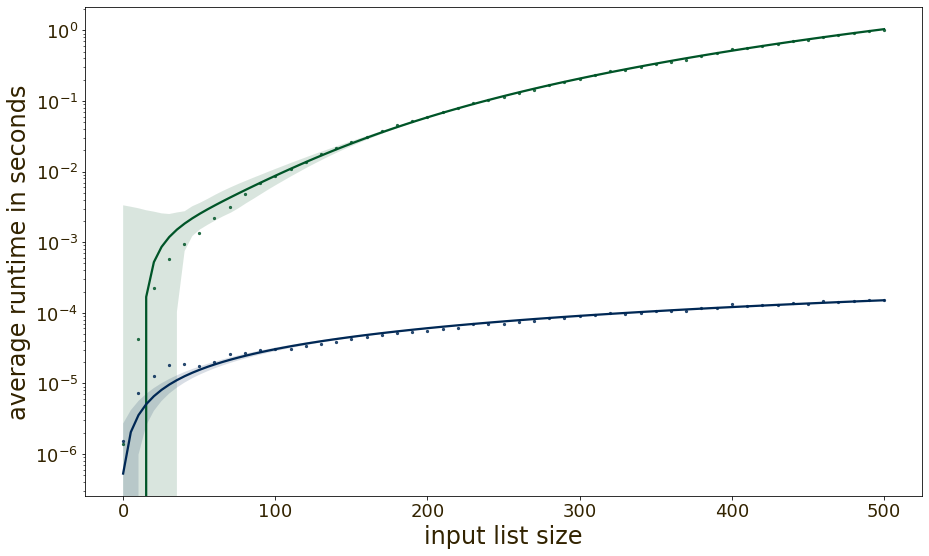

In [31]:
import seaborn as sbn
import matplotlib.pyplot as plt

keylist_brute = list(perf_brute.keys())
vallist_brute = list(perf_brute.values())

keylist_kadane = list(perf_kadane.keys())
vallist_kadane = list(perf_kadane.values())

fig, ax = plt.subplots()
fig.set_size_inches(15, 9)
plt.xticks(fontsize=18, color="#322300")
plt.yticks(fontsize=18, color="#322300")
ax.set_xlabel("input list size", fontsize=24, color="#322300")
ax.set_ylabel("average runtime in seconds", fontsize=24, color="#322300")
ax.set_yscale('log')

sbn.regplot(x=keylist_brute, y=vallist_brute, color='#005528', \
            order=3, scatter_kws={'s':5})  # green for brute force
sbn.regplot(x=keylist_kadane, y=vallist_kadane, color='#002855', \
            order=1, scatter_kws={'s':5})  # blue for Kadane